In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
bb_episodes = pd.read_csv("breaking_bad.csv", encoding='cp1252')
bb_episodes.head(20)



,Date,Season,Episode,Title,Directed by,Written by,Duration_mins,Summary,Rating_IMDB,U.S. viewers_million
0,20-Jan-08,1,1,Pilot,Vince Gilligan,Vince Gilligan,58,"Diagnosed with terminal lung cancer, chemistry...",9.1,1.41
1,27-Jan-08,1,2,Cat's in the Bag...,Adam Bernstein,Vince Gilligan,48,After their first drug deal goes terribly wron...,8.7,1.49
2,10-Feb-08,1,3,...And the Bag's in the River,Adam Bernstein,Vince Gilligan,48,Walt and Jesse clean up after the bathtub inci...,8.8,1.08
3,17-Feb-08,1,4,Cancer Man,Jim McKay,Vince Gilligan,48,Walt tells the rest of his family about his ca...,8.3,1.09
4,24-Feb-08,1,5,Gray Matter,Tricia Brock,"Vince Gilligan, Patty Lin",48,Walt rejects everyone who tries to help him wi...,8.4,0.97
5,02-Mar-08,1,6,Crazy Handful of Nothin',Bronwen Hughes,"Vince Gilligan, George Mastras",48,With the side effects and cost of his treatmen...,9.3,1.07
6,09-Mar-08,1,7,A No-Rough-Stuff-Type Deal,Tim Hunter,"Vince Gilligan, Peter Gould",48,Walt and Jesse try to up their game by making ...,8.9,1.50
7,08-Mar-09,2,1,Seven Thirty-Seven,Bryan Cranston,"Vince Gilligan, J. Roberts",47,Walt and Jesse realize how dire their situatio...,8.7,1.66
8,15-Mar-09,2,2,Grilled,Charles Haid,"Vince Gilligan, George Mastras",46,Walt's disappearance is met with investigation...,9.3,1.60
9,22-Mar-09,2,3,Bit by a Dead Bee,Terry McDonough,"Vince Gilligan, Peter Gould, George Mastras",47,Walt and Jesse try to come up with alibis for ...,8.4,1.13


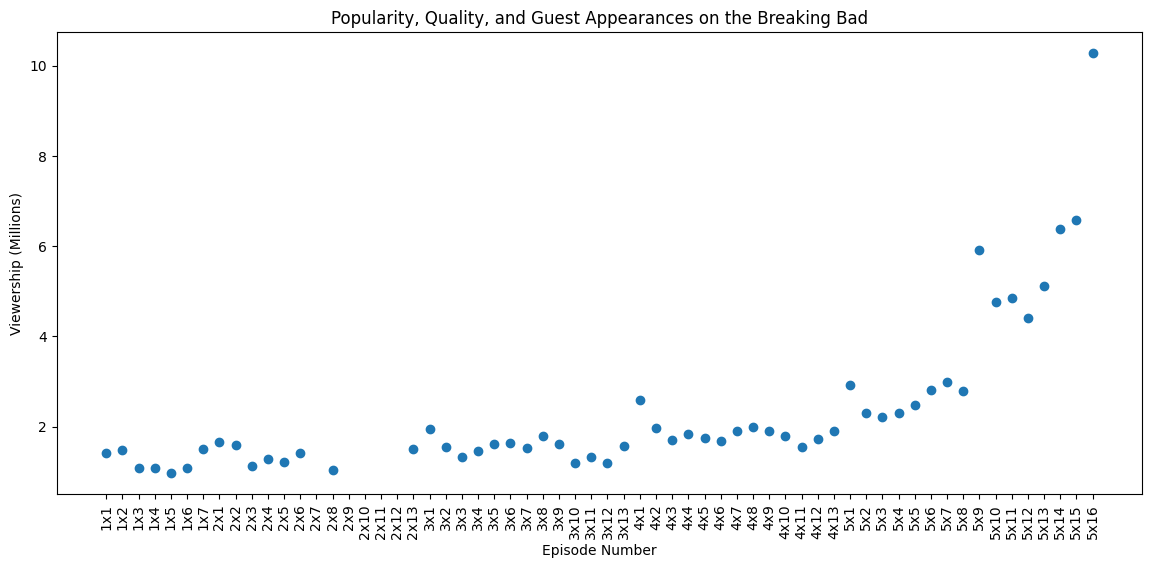

In [3]:
# Create a unique episode identifier combining season and episode numbers
bb_episodes['Episode_Identifier'] = bb_episodes['Season'].astype(str) + 'x' + bb_episodes['Episode'].astype(str)

# Create the scatter plot using the unique episode identifier for x-values
plt.figure(figsize=(14, 6))
plt.scatter(bb_episodes['Episode_Identifier'], bb_episodes['U.S. viewers_million'])
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Breaking Bad')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

Coloring the ratings


In [4]:
# Create a color_scheme list
colors = []

# Iterate over rows of office_episodes to input color name to the colors list
for lab, row in bb_episodes.iterrows():
    if row['Rating_IMDB'] < 7:
        colors.append("red")
    elif 0.25 <= row['Rating_IMDB'] < 8:
        colors.append("orange")
    elif 0.50 <= row['Rating_IMDB'] < 9:
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")

# Inspect the first 10 values in the list      
colors[:10]

['darkgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'lightgreen']

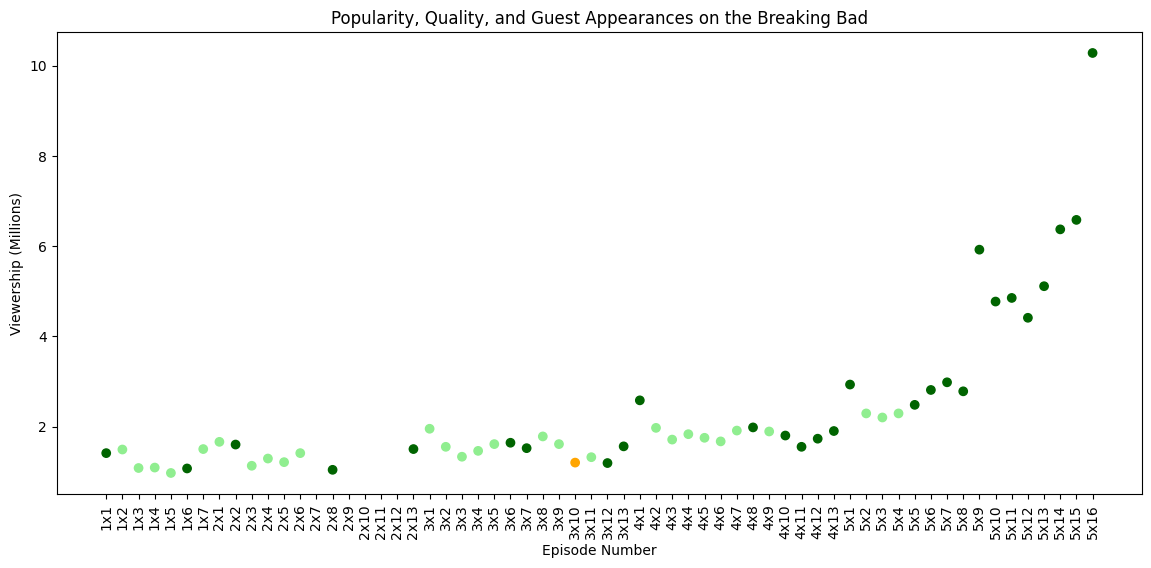

In [5]:
bb_episodes['Episode_Identifier'] = bb_episodes['Season'].astype(str) + 'x' + bb_episodes['Episode'].astype(str)

# Create the scatter plot using the unique episode identifier for x-values
plt.figure(figsize=(14, 6))
plt.scatter(bb_episodes['Episode_Identifier'], bb_episodes['U.S. viewers_million'], c=colors)
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Breaking Bad')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

Histogram for IMDb Ratings:

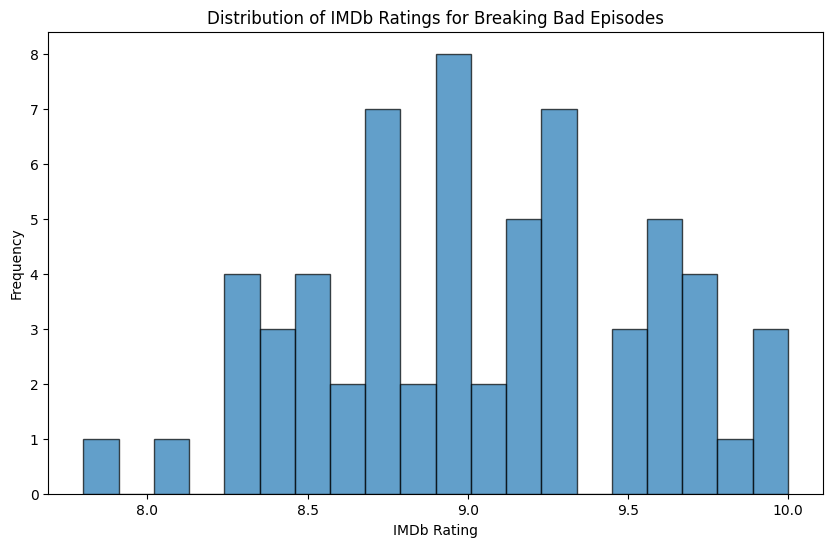

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(bb_episodes['Rating_IMDB'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Ratings for Breaking Bad Episodes')
plt.show()

Correlation between views and rating

In [20]:
import numpy as np
bb_episodes_sub=bb_episodes.dropna()
bb_episodes[['Rating_IMDB','U.S. viewers_million']].isna().sum()
# Calculate the correlation coefficient
correlation = np.corrcoef(bb_episodes_sub['Rating_IMDB'], bb_episodes_sub['U.S. viewers_million'])[0, 1]

# Print the correlation coefficient
print(f'Correlation coefficient between IMDb ratings and viewership: {correlation:.2f}')

Correlation coefficient between IMDb ratings and viewership: 0.54


In [21]:
bb_episodes_sub[['Rating_IMDB','U.S. viewers_million']].isna().sum()

Rating_IMDB             0
U.S. viewers_million    0
dtype: int64

In [24]:
np.corrcoef(bb_episodes_sub['Rating_IMDB'], bb_episodes_sub['U.S. viewers_million'])

array([[1.       , 0.5375749],
       [0.5375749, 1.       ]])

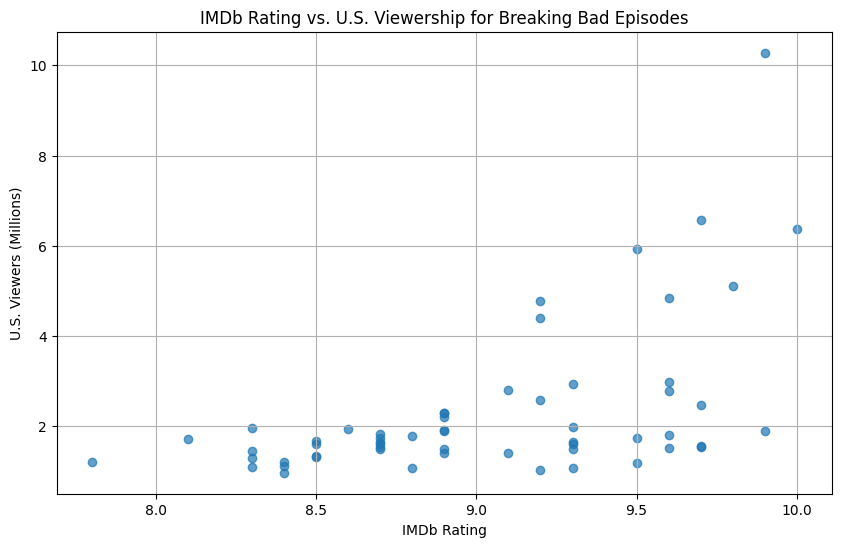

In [25]:
import matplotlib.pyplot as plt

# Scatter plot of IMDb ratings vs. viewership
plt.figure(figsize=(10, 6))
plt.scatter(bb_episodes['Rating_IMDB'], bb_episodes['U.S. viewers_million'], alpha=0.7)
plt.xlabel('IMDb Rating')
plt.ylabel('U.S. Viewers (Millions)')
plt.title('IMDb Rating vs. U.S. Viewership for Breaking Bad Episodes')
plt.grid(True)
plt.show()

c:\Users\myahy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


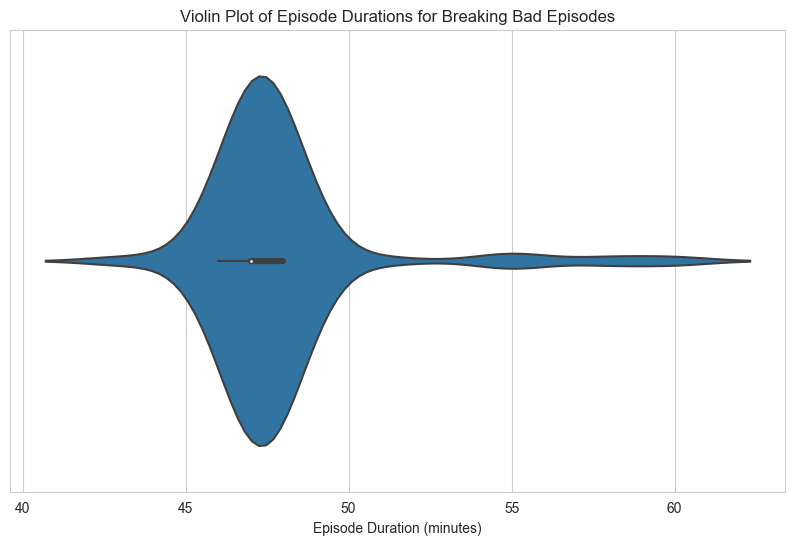

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visualization
sns.set_style("whitegrid")

# Plotting a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=bb_episodes['Duration_mins'])
plt.xlabel('Episode Duration (minutes)')
plt.title('Violin Plot of Episode Durations for Breaking Bad Episodes')
plt.show()

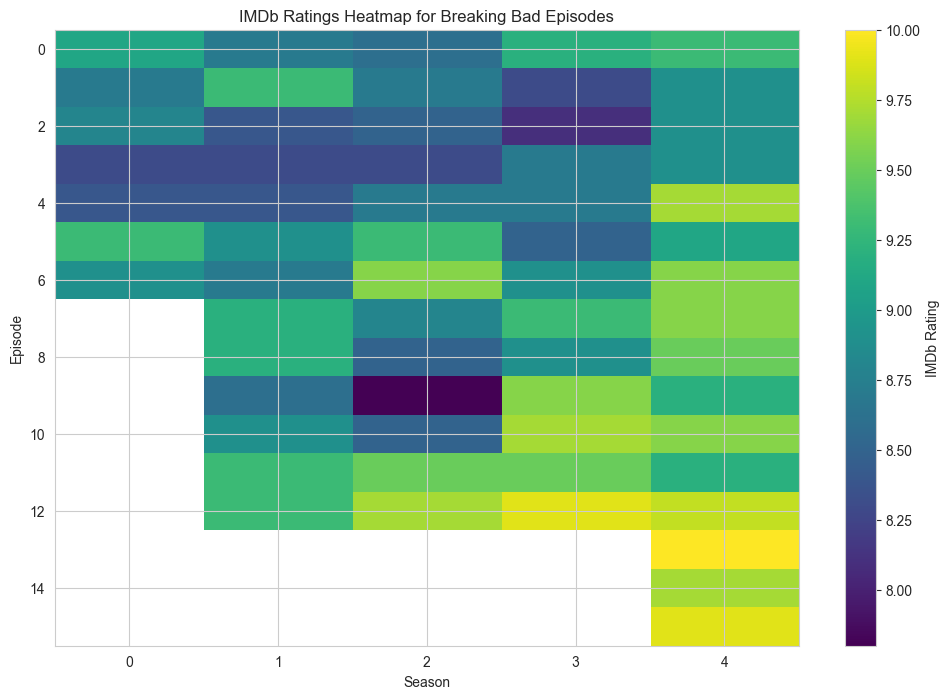

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare the data for the heatmap
ratings = bb_episodes.pivot(index='Episode', columns='Season', values='Rating_IMDB')

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(ratings, cmap='viridis', aspect='auto', interpolation='nearest')
plt.colorbar(label='IMDb Rating')
plt.xlabel('Season')
plt.ylabel('Episode')
plt.title('IMDb Ratings Heatmap for Breaking Bad Episodes')
plt.show()